<a href="https://colab.research.google.com/github/gaberm/ML-Journey/blob/master/Tutorials/Linear%20Regression%20%26%20Multiple%20outputs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass learning

In [0]:
from sklearn import datasets
from sklearn.multiclass import OutputCodeClassifier

X, y = datasets.load_iris(return_X_y=True)


In [3]:
# Multioutput - Linear SVC
from sklearn.svm import LinearSVC
clf = OutputCodeClassifier(LinearSVC(random_state=0, max_iter=4000),
                           code_size=2, random_state=0)
y_pred = clf.fit(X, y).predict(X)
y_pred

# Checking accuracy
from sklearn.metrics import (accuracy_score, classification_report )

classr = classification_report ( y, y_pred)

print (
    classr,
    sep='\n'
)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.91      0.86      0.89        50
           2       0.87      0.92      0.89        50

    accuracy                           0.93       150
   macro avg       0.93      0.93      0.93       150
weighted avg       0.93      0.93      0.93       150



In [4]:
# SingleOP - Linear SVC

clf = LinearSVC(random_state=0, max_iter=4000)
y_pred = clf.fit(X, y).predict(X)
y_pred

# Checking accuracy
from sklearn.metrics import (accuracy_score, classification_report )

classr = classification_report ( y, y_pred)

print (
    classr,
    sep='\n'
)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.94      0.95        50
           2       0.94      0.96      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



# A beginner’s guide to Linear Regression in Python with Scikit-Learn

**Simple Linear Regression**
Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output). Hence, the name is Linear Regression

$y=Ax+B$
*Where b is the intercept and m is the slope of the line. *

**Multiple Linear Regression**
This same concept can be extended to cases where there are more than two variables. This is called multiple linear regression. 

A regression model involving multiple variables can be represented as:

$y = b0 + m1b1 + m2b2 + m3b3 + … … mnbn$

This is the equation of a hyperplane. Remember, a linear regression model in two dimensions is a straight line; in three dimensions it is a plane, and in more than three dimensions, a hyperplane.

*Ref. https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f*

*More. https://towardsdatascience.com/@nageshsinghchauhan*

In [0]:
# Envset
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns; sns.set()
%matplotlib inline

In [4]:
# Getting the data
from google.colab import drive
drive.mount('/gdrive')

%cd /gdrive/'My Drive/Colab Notebooks/Datasets'
dataset = pd.read_csv('Weather.csv')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/Colab Notebooks/Datasets


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
print( dataset.shape,
      dataset.describe(),
      sep='\n' )

(119040, 31)
                 STA  WindGustSpd        MaxTemp  ...  RHN  RVG  WTE
count  119040.000000   532.000000  119040.000000  ...  0.0  0.0  0.0
mean    29659.435795    37.774534      27.045111  ...  NaN  NaN  NaN
std     20953.209402    10.297808       8.717817  ...  NaN  NaN  NaN
min     10001.000000    18.520000     -33.333333  ...  NaN  NaN  NaN
25%     11801.000000    29.632000      25.555556  ...  NaN  NaN  NaN
50%     22508.000000    37.040000      29.444444  ...  NaN  NaN  NaN
75%     33501.000000    43.059000      31.666667  ...  NaN  NaN  NaN
max     82506.000000    75.932000      50.000000  ...  NaN  NaN  NaN

[8 rows x 24 columns]


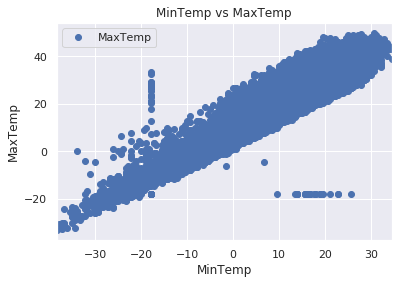

In [6]:
dataset.plot(x='MinTemp', y='MaxTemp', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

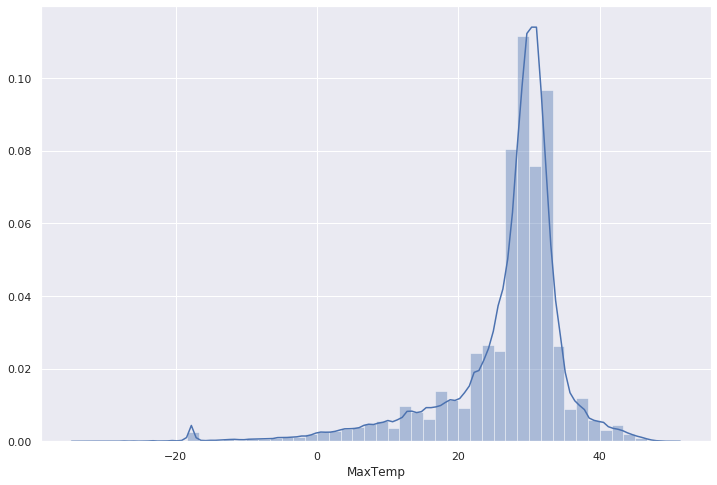

In [7]:
plt.figure(figsize=(12,8))
plt.tight_layout()
sns.distplot(dataset['MaxTemp'], )

### Our next step is to divide the data into “attributes” and “labels”.
Attributes are the independent variables while labels are dependent variables whose values are to be predicted. In our dataset, we only have two columns. We want to predict the MaxTemp depending upon the MinTemp recorded. Therefore our attribute set will consist of the “MinTemp” column which is stored in the X variable, and the label will be the “MaxTemp” column which is stored in y variable.

In [8]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Features, Labels split
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)

# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Model
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

# Regression Coefficients
print(f'Regressor Intercept (b): {regressor.intercept_}', 
      f'Regressor Slope (a): {regressor.coef_}',
      sep='\n')

# Predictions
y_pred = regressor.predict(X_test)

# Preping for Plots
plot_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

Regressor Intercept (b): [10.66185201]
Regressor Slope (a): [[0.92033997]]


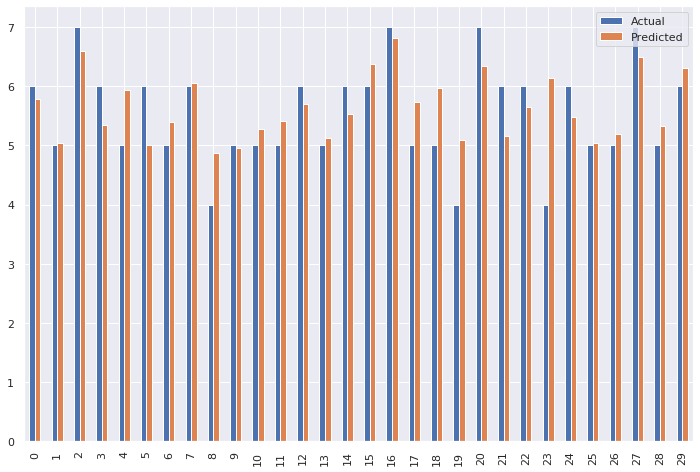

In [99]:
# plotting
plot_df[:30].plot(kind='bar', figsize = (12,8))
# plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
# plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# plt.show()


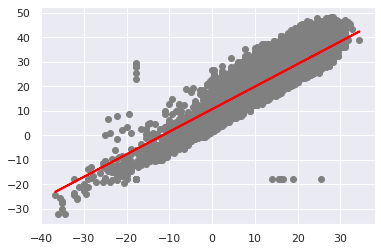

In [17]:
# Plotting Actual & Predicted
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

## Common used Evaluation metrics
1. Mean Absolute Error (MAE) is the mean of the absolute value of the errors.
$$ {MAE} = \frac {\sum_{i=1}^{n}|y_i-z_i|}n = \frac {\sum_{i=1}^{n}|e_i|}n $$

2. Mean Squared Error (MSE) is the mean of the squared errors and is calculated as:
$${MSE} ={ {\frac{1}{N} \sum _{i}^{n} ({ {Y}}_{i}-\hat y_{i})^{2}}}$$

2. Root Mean Squared Error (MSE) is the mean of the squared errors and is calculated as:
$${RMSE} ={\sqrt {\frac{1}{n} \sum _{j=1}^{n} ({ {y}}_{j}-\hat y_{j})^{2}}}$$

In [31]:
# Calculating Error metrics

print( 'Mean of All the Temp. {:.3f} c'.format(dataset.MeanTemp.mean()),
        'Mean Absolute Error: {}'.format(metrics.mean_absolute_error(y_test, y_pred)), 
        'Mean Squared Error: {}'.format(metrics.mean_squared_error(y_test, y_pred)), 
        'Root Mean Squared Error: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))), 
        sep = '\n')


Mean of All the Temp. 22.412 c
Mean Absolute Error: 3.19932917837853
Mean Squared Error: 17.631568097568447
Root Mean Squared Error: 4.198996082109204


**You can see that the value of root mean squared error is 4.19, which is more than 10% of the mean value of the percentages of all the temperature i.e. 22.41. This means that our algorithm was not very accurate but can still make reasonably good predictions.**

# Multiple Linear Regression

![alt text](https://miro.medium.com/max/774/1*r3aOsJoXHX7uC2nxn2lygQ.png)

Linear regression involving multiple variables is called “multiple linear regression” or multivariate linear regression. The steps to perform multiple linear regression are almost similar to that of simple linear regression. The difference lies in the evaluation. You can use it to find out which factor has the highest impact on the predicted output and how different variables relate to each other.

In [0]:
# Loading SciKit data 
# from sklearn.datasets import load_wine
# data = load_wine()

# features = pd.DataFrame( data.data, columns=data.feature_names)
# label = pd.DataFrame( data.target, columns=['class'])

# dataset = features.merge(label, left_index=True, right_index=True )

In [79]:
# Loading Wine quality from gdrive
dataset = pd.read_csv('winequality.csv')

# exploring
dataset.describe()
dataset.isnull().any() & dataset.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

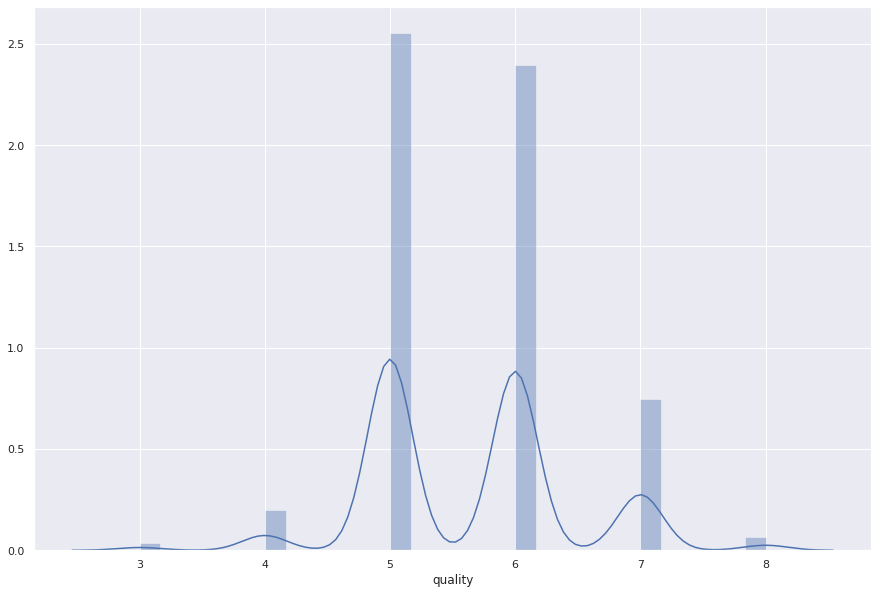

In [82]:
# Feature, label split 
X = dataset[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']].values
y = dataset['quality'].values

# check the average value of the “quality” column.

plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(dataset['quality'])

In [92]:
# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Model
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

# Print Coeff
col_l = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']
print (pd.DataFrame(regressor.coef_, col_l, columns=['Coefficients']))

# Predict
y_pred = regressor.predict(X_test)

# plot_df
plot_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

                      Coefficients
fixed acidity             0.041284
volatile acidity         -1.149528
citric acid              -0.177927
residual sugar            0.027870
chlorides                -1.873407
free sulfur dioxide       0.002684
total sulfur dioxide     -0.002777
density                 -31.516666
pH                       -0.254486
sulphates                 0.924040
alcohol                   0.267797


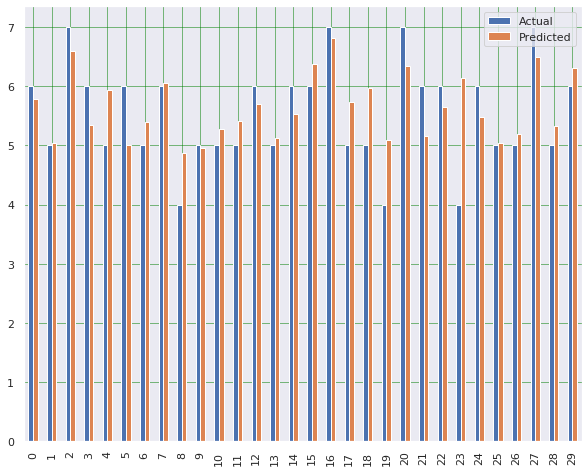

In [98]:
# plot the comparison of Actual and Predicted values

plot_df[:30].plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# plt.show()

In [102]:
dataset.head(3)

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5

[3 rows x 12 columns]

In [104]:
# Calculating Error metrics

print( 'Mean of All wine quality. {:.3f} '.format(dataset.quality.mean()),
        'Mean Absolute Error: {}'.format(metrics.mean_absolute_error(y_test, y_pred)), 
        'Mean Squared Error: {}'.format(metrics.mean_squared_error(y_test, y_pred)), 
        'Root Mean Squared Error: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))), 
        sep = '\n')


Mean of All wine quality. 5.636 
Mean Absolute Error: 0.4696330928661103
Mean Squared Error: 0.38447119782012373
Root Mean Squared Error: 0.6200574149384263


**You can see that the value of root mean squared error is 0.62, which is slightly greater than 10% of the mean value which is 5.63. This means that our algorithm was not very accurate but can still make reasonably good predictions.**

${RMSE}$ : is a way of measuring how good our predictive model is over the actual data, the smaller RMSE the better way of the model behaving

*Ref. https://stats.stackexchange.com/questions/29356/conceptual-understanding-of-root-mean-squared-error-and-mean-bias-deviation*